In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt


In [2]:
#!pip install scipy
from scipy.stats import linregress

In [3]:
dogdf = pd.read_csv("dog_rates_tweets.csv", parse_dates=['created_at'])

In [4]:
def extract_dog_rates(text):
    matched_values = re.search(r'(\d+(\.\d+)?)/10',text)
    if matched_values:
        return float(matched_values.group(1))
    return None

In [5]:
dogdf['rating'] = dogdf['text'].apply(extract_dog_rates)

In [6]:
dogdf = dogdf[dogdf['rating'].notnull()]

In [7]:
dogdf = dogdf[dogdf['rating'] <= 25]

In [8]:
dogdf['TimeStamp'] = dogdf['created_at'].apply(lambda x: x.timestamp())

In [9]:
x = dogdf['TimeStamp']
y = dogdf['rating']

In [12]:
result = linregress(x,y)
best_line = result.slope * x + result.intercept
best_line

2       13.185763
7       13.181785
8       13.179609
24      13.167614
30      13.163804
          ...    
7363    13.507338
7369    13.503856
7381    13.498710
7431    13.482540
7433    13.480725
Name: TimeStamp, Length: 1669, dtype: float64

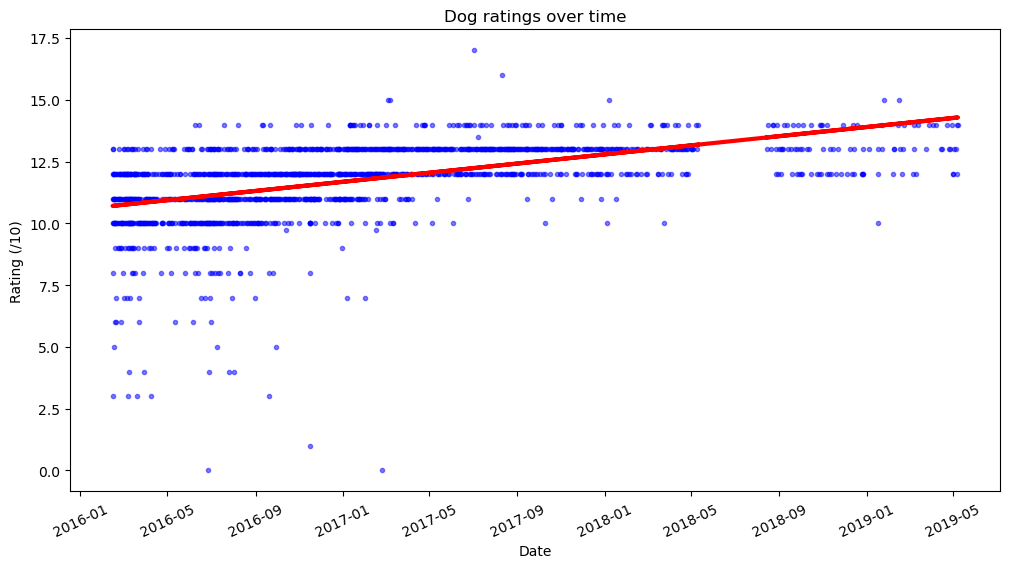

In [11]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=25)
plt.plot(dogdf['created_at'], dogdf['rating'], 'b.', label='Ratings', alpha=0.5)
plt.plot(dogdf['created_at'], best_line, 'r-', label='Best-Fit line', linewidth=3)
plt.title('Dog ratings over time')
plt.xlabel('Date')
plt.ylabel('Rating (/10)')
plt.show()